# Network Management and Automation
# Lab 3 - Automation I


# University of Colorado Boulder
# Network Engineering Program

Professor Levi Perigo, Ph.D.


# Note:
Do not change the name of the file lab3.ipynb while submitting.

In [ ]:
def Student_name():
       return "Ankit Madnawat"#_____________________ENTER YOUR NAME HERE____________Example: return "Levi Perigo"

# Summary
Organizations today look for network automation capabilities in their hardware and software. In its simplest form, network automation is aimed to reduce manual effort in routine tasks and automate what used to be typed by network administrators into command line interfaces (CLIs).  Network automation can start with scripting and progress to intelligent network control, and ultimately allow efficient translation and deployment of network plans and policies. 
If interested, please feel free to contribute to the below Open Source communities.

•	Netmiko Source Code: https://github.com/ktbyers/netmiko

•	NAPALM Source Code: https://github.com/napalm-automation/napalm

•	Paramiko Source Code: https://github.com/paramiko/paramiko

•	Pexpect Source Code: https://github.com/pexpect/pexpect

# Objectives

•	Learn how to remotely access network devices.

•	Learn how to parse configuration files and automate device configuration without using CLI.

•	Learn how to perform output scraping.

•	Learn how to back up configurations to cloud.

# Problem Statement:

You are a Network Engineer assigned with the task of configuring a hundred new devices in your organization’s data center network. The hours required for manually configuring a network of this scale will be upwards of 300 hours (if you are being optimistic). Your manager has asked you to come up with a more efficient, less time-consuming approach. You have a week to demonstrate your method on a smaller topology, as a proof of concept (POC). 

The majority of data center networks have started using Border Gateway Protocol (BGP) due to several performance advantages over other protocols. For the given topology, automate the process of configuring a BGP session between the routers. As the routers are in the same Autonomous System, they will run internal BGP (iBGP) between them.



# Guidelines:


1.	Import the GNS3 topology provided on Canvas and start it, install Jupyter on your system (or VM) to act as your IDE/terminal
2.	Before writing the code, ensure that SSHv2 is enabled on the routers by using 'show ip ssh' command. If not, please enable SSH on the routers.
3.	Avoid hard coding IPs and credentials in your code; use config files wherever required.
4.	Use Netmiko module for SSH. Also, use functions/classes for clarity of code.
5.	While implementing the code, think about “parallel processing”. The configuration should be deployed on all the devices at the same time.
6. Run all the methods within main to show your output 


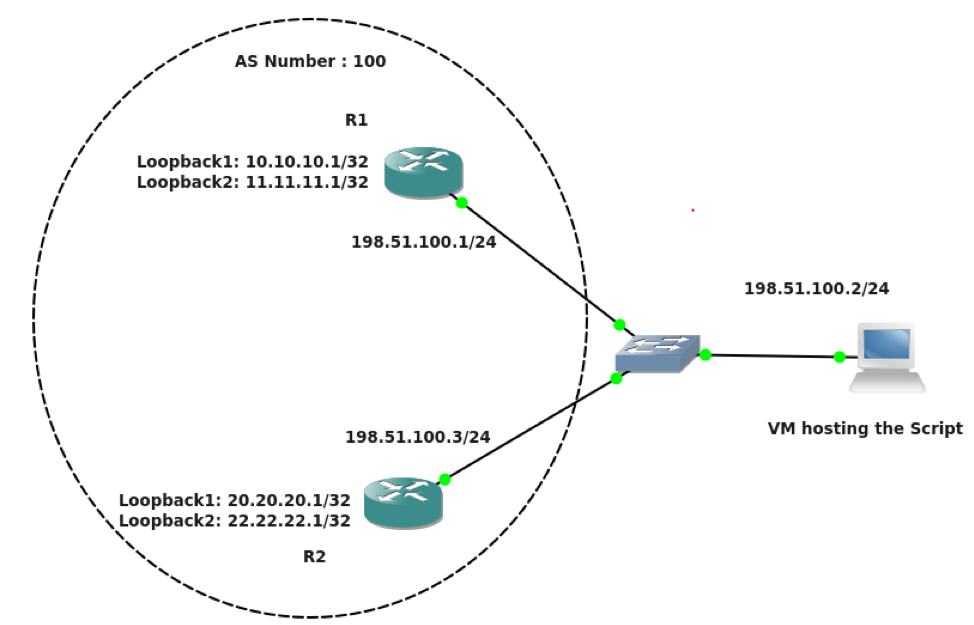

# Objective 1 [10 Points]:

# File Parsing and Verification 

Use the "sshInfo.csv" provided in the assignment folder and/ Canvas for this objective. 

"Parse_file" should take the sshInfo.csv file as input which includes the login credentials (username and password) and the IPs used to SSH into the two routers and return a list of dictionaries where each dictionary represents the credentials required for each router in the network. Also return a list of the IPs of the devices. 
eg. return [{'device_type': linux, 'username': ubuntu, 'password': 'ubuntu123', 'ip': '10.10.10.10'},{'device_type': linux, 'username': centOs, 'password': 'CentOs23', 'ip': '20.20.20.20'}], ['10.10.10.10', '20.20.20.20']

Error handling should be performed to check if the file exists (return -1, -1, if file does not exist).


In [1]:
try:
    import csv
    import os
except:
    print("Install the necessary libraries!!")


def Parse_file():
    try:
        with open('sshInfo.csv','r') as f:
            data = csv.DictReader(f)
            credentials = list(data)
            print(credentials)        
            IP = []
            for i in range(0,len(credentials)):
                IP.append(credentials[i]['ip'])
            print(IP)
    except FileNotFoundError:
        return -1, -1
    
if __name__ == "__main__":
    Parse_file()
    
    #return # List of dictionaries where each dictionary represents the credentials required
#for each router in the network AND a List of IPs of the devices

[OrderedDict([('device_type', 'cisco_ios'), ('username', 'lab'), ('password', 'lab123'), ('ip', '198.51.100.1')]), OrderedDict([('device_type', 'cisco_ios'), ('username', 'lab'), ('password', 'lab123'), ('ip', '198.51.100.3')])]
['198.51.100.1', '198.51.100.3']


In [ ]:
# Run the above method within main

if __name__ == "__main__"

# Do it for the rest of the methods (Add this cell to run each method)

# Objective 2 [ 20 Points]:

# IP Address Validation

Check that the extracted IPs from sshInfo.csv are valid IP addresses (Examples of invalid IPs: 10.10.300.10, 192.168.1, etc.). Print and return the valid IP addresses in a list.

Hint: Use the values returned from the "Parse_file" function to iterate over the IPs.


In [2]:
try:
    import csv
    import ipaddress
except:
    print("Install the necessary libraries!")


def Parse_file():
    try:
        with open('sshInfo.csv','r') as f:
            data = csv.DictReader(f)
            credentials = list(data)         
            IP = []
            for i in range(0,len(credentials)):
                IP.append(credentials[i]['ip'])
            return(credentials,IP)
    except FileNotFoundError:
        return -1, -1

def IsValid(IPadd):
    try:
        ipaddress.ip_address(IPadd)
        return True
    except ValueError:
        return False

def Val_IP(IPadd):
    Valid_IP = []
    for i in IPadd:
        value = IsValid(i)            
        if value == True:
            Valid_IP.append(i)
        else:
            print("Not a valid IP address!!")
    print(f"Valid IP addresses are: {Valid_IP}")
    return(Valid_IP)    

if __name__ == "__main__":
    Dict,IPaddress = Parse_file()
    Val_IP(IPaddress)

Valid IP addresses are: ['198.51.100.1', '198.51.100.3']


# Objective 3 [20 Points]:

# IP Address Connectivity


Check if your code has reachability (successful pings) to the GNS3 devices using the valid IP addresses obtained from the CSV.

"Is_connected" function should take IP address as input and it is of string datatype. It should return a True or False depending on whether the IP address is reachable (successful pings) or not, respectively.


"Connected_devices" function uses "Is_connected" to filter out all the IP addresses which have connectivity, print and return the final list of valid IPs

Hint: Use the returned list from "Val_IP" function to test for connectivity only to *Valid* IP addresses.


In [2]:
try:
    import csv
    import ipaddress
    import subprocess
except:
    print("Install the necessary libraries!")


def Parse_file():
    try:
        with open('sshInfo.csv','r') as f:
            data = csv.DictReader(f)
            credentials = list(data)         
            IP = []
            for i in range(0,len(credentials)):
                IP.append(credentials[i]['ip'])
            return(credentials,IP)
    except FileNotFoundError:
        return -1, -1

def IsValid(IPadd):
    try:
        ipaddress.ip_address(IPadd)
        return True
    except ValueError:
        return False

def Val_IP(IPadd):
    Valid_IP = []
    for i in IPadd:
        value = IsValid(i)             
        if value == True:
            Valid_IP.append(i)
        else:
            print(f"{i} is not a valid IP address!!")
    return(Valid_IP)

def Is_connected(device_add):
    ping = subprocess.check_output(['ping', device_add, '-c5'])
    if bool(ping) == True:
        #print(f"{device_add} is connected.")
        return True
    else:
        #print(f"{device_add} is not connected.")
        return False

def Connected_devices(hosts):
    devices = []
    for i in hosts:
        connected = Is_connected(i)
        if connected == True:
            devices.append(i)
        else:
            print(f"IP {i} not connected.")
    print(f"Connected devices are: {devices}")
    return(devices)                              


if __name__ == "__main__":
    Dict,IPaddress = Parse_file()
    IPlist = Val_IP(IPaddress)
    Connected_devices(IPlist)



Connected devices are: ['198.51.100.1', '198.51.100.3']


# Objective 4 [80 Points + 20 Points for Parallel Processing]:

# iBGP Configuration

Create a “bgp.conf” file with structure and content of your choice. This file could include essential information required to configure iBGP. For example: 

For R1:

LocalAS_number:

NeighborIP:

NeighborRemoteAS:

NetworkListToAdvertise: [This should be a list of networks to advertise]

Using information parsed from the “bgp.conf” file that you created, configure iBGP between the routers on their physical interfaces (198.51.100.0/24). The loopback addresses should be included in the advertised networks list

(You could refer the following link for the configuration commands: 
https://networklessons.com/bgp/internal-bgp-border-gateway-protocol-explained/)

Your function "Bgp_config" should take in the filename (bgp.conf), connect to the devices using technologies like Netmiko, login credentials for the routers can be taken from the sshInfo.csv for the devices where connection is successful (Hint: Use the "Parse_file" function to identify the credentials, use "Connected_devices" to identify devices to iterate over). Configure BGP in these devices, consider using paralel processing. Paralel processing can be implemented by configuring BGP on both the routers simultaneously.

Display the “show ip bgp neighbors” once connectivity is established on each of the routers. 

Display the ping from loopback of one router to the other.

Return important information in the format as shown below using Pretty tables: 



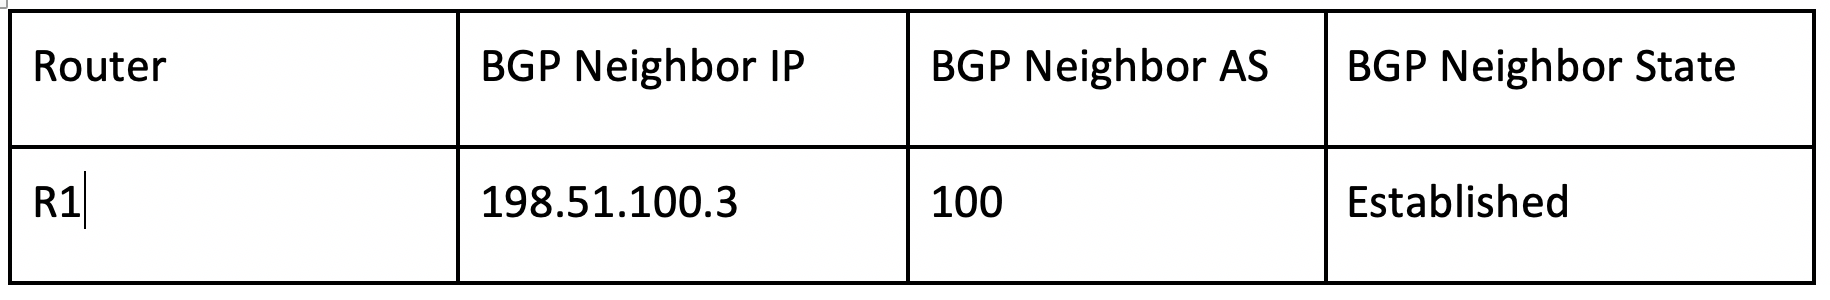


In [1]:
try:
    from netmiko import ConnectHandler
    from prettytable import PrettyTable
    import csv
    import ipaddress
    import subprocess
    import configparser
    import time
except:
    print("Install the necessary libraries!")


def Parse_file():
    try:
        with open('sshInfo.csv','r') as f:
            data = csv.DictReader(f)
            credentials = list(data)         
            IP = []
            for i in range(0,len(credentials)):
                IP.append(credentials[i]['ip'])
            return(credentials,IP)
    except FileNotFoundError:
        return -1, -1

def IsValid(IPadd):
    try:
        ipaddress.ip_address(IPadd)
        return True
    except ValueError:
        return False

def Val_IP(IPadd):
    Valid_IP = []
    for i in IPadd:
        value = IsValid(i)             
        if value == True:
            Valid_IP.append(i)
        else:
            print(f"{i} is not a valid IP address!!")
    return(Valid_IP)

def Is_connected(device_add):
    ping = subprocess.check_output(['ping', device_add, '-c5'])
    if bool(ping) == True:
        return True
    else:
        return False


def Connected_devices(hosts):
    devices = []
    for i in hosts:
        connected = Is_connected(i)
        if connected == True:
            devices.append(i)
        else:
            print(f"IP {i} not connected.")
    return(devices)                            



def Bgp_config(lab, login):
    parser = configparser.ConfigParser()
    parser.read("bgp.conf")
    
    for ip in lab:
        for j in range(0,len(lab)):
            if ip in login[j].values():
                connection = ConnectHandler(**login[j])
                connection.enable()
                for i in range(1,3):
                    value1 = parser[f'R{i}']['LocalAS_number']
                    value2 = parser[f'R{i}']['NeighborIP']
                    value3 = parser[f'R{i}']['NeighborRemoteAS']
                    value4 = parser[f'R{i}']['NetworkListToAdvertise']
                    value5 = value4.split(',')
                    x = value5[0]
                    y = value5[1]
                    z = value5[2]
                    command = ['router ospf 1', f'network {x} 0.0.0.255 area 0', f'network {y} 0.0.0.255 area 0', f'network {z} 0.0.0.255 area 0', f'router bgp {value1}', f'neighbor {value2} remote-as {value3}']
                    connection.send_config_set(command)
                connection.disconnect()
    time.sleep(10)
    for ip in lab:
        for j in range(0,len(lab)):
            if ip in login[j].values():
                connection = ConnectHandler(**login[j])
                print(f"For R{j+1}")
                show_bgp = connection.send_command("show ip bgp neighbors")
                print(show_bgp)
                connection.disconnect()
    time.sleep(40)
    connection = ConnectHandler(**login[0])
    print("pinging from R1's loopback 1 to R2's loopback address 20.20.20.1\n")
    ping = connection.send_command("ping 20.20.20.1 source lo1")
    print(ping)
    connection.disconnect()
    
    if '100 percent' in ping:
    
        Table = PrettyTable(["Router", "BGP Neighbor IP", "BGP Neighbor AS", "BGP Neighbor State"])
        Table.add_row(["R1", "198.51.100.3", "100", "Established"])
        Table.add_row(["R2", "198.51.100.1", "100", "Established"])
        print("\n\n\n\n")
        print(Table)

        return(Table)
    
if __name__ == "__main__":
    Dict,IPaddress = Parse_file()
    IPlist = Val_IP(IPaddress)
    devices = Connected_devices(IPlist)
    Bgp_config(devices, Dict)

For R1
BGP neighbor is 198.51.100.3,  remote AS 100, internal link
  BGP version 4, remote router ID 22.22.22.1
  BGP state = Established, up for 00:00:05
  Last read 00:00:05, last write 00:00:05, hold time is 180, keepalive interval is 60 seconds
  Neighbor sessions:
    1 active, is not multisession capable (disabled)
  Neighbor capabilities:
    Route refresh: advertised and received(new)
    Four-octets ASN Capability: advertised and received
    Address family IPv4 Unicast: advertised and received
    Enhanced Refresh Capability: advertised and received
    Multisession Capability: 
    Stateful switchover support enabled: NO for session 1
  Message statistics:
    InQ depth is 0
    OutQ depth is 0
    
                         Sent       Rcvd
    Opens:                  1          1
    Notifications:          0          0
    Updates:                0          0
    Keepalives:             1          1
    Route Refresh:          0          0
    Total:                  2     

# Report Question [5 Points]:
Go through this article: http://money.cnn.com/2017/03/02/technology/amazon-s3-outage-human-error/index.html
Do you think the objectives of this lab can help avoid such incidents? Why/why not? 

In [ ]:
'''Yes, I think objective of this lab can help to avoid such incidents because using the threading pool, we can
limit the number of device that will get configure at a time. By this, we can check simultaneously if something went 
wrong on a cluster of devices.'''